# The Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

In [1]:
# Import the libraries necessary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings                     #This is for supressing the warnings
warnings.filterwarnings("ignore")


### Note

The rest of the libraries we will import as and when it requires!

# Step 1: Read and Understand the Data

This step is the first and the foremost step to begin with. 
Here, we do the following:

- Read data
- Check the shape of data
- Describe data
- Check null values if any

### Read Data

Import the data to read it.

In [2]:
house = pd.read_csv("https://ml-course3-upgrad.s3.amazonaws.com/Assignment_+Advanced+Regression/train.csv")
house.head() #Get the first five values

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Check the Shape of Data

The shape is nothing but the number of rows and the columns of the dataset given.

In [3]:
# Shape

house.shape

(1460, 81)

### Comment

There are 1460 rows and 81 columns in the house dataset!

### Describe the Data

Get a brief description of the house dataset. It gives **min, max, percentiles, etc.**

In [4]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Check the Null Values in the Data

Checking the null values is crucial as it will help us analyze the data properly at the end.
If null values found, we will remove them in the beginning itself!


In [5]:
house.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

### Comment

Got anything? We examin the null values in detail in data cleaning step.

### Know the Datatypes 

Using **info** we will know the datatypes of the house dataset

In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Step 2: Cleaning the Data

In this step, we will focus on just getting the clean data to proceed further in our process of analyzing the house data.

Here, we'll check the null values and treat them.

- Null values in rows
- Null values in columns
- Impute the null values if any

Note: We are going to remove the rows and/or columns that have null value percentage above 90.


### Null values in rows

In [7]:
house.isnull().sum() #Let's see the sum of null values in the whole data

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
house.isnull().all(axis=0).sum()  #Checking row-wise null values

0

### Comment

The number of entire row null values, as a sum, is equal to **ZERO**. 

### Null values in columns

Check the sum of the null values column-wise.

In [9]:
house.isnull().all(axis=1).sum()

0

### Comment

The entire null value columns are **ZERO**.

### Percentage of null values in columns

Let's find out the percentage of null values in columns of the house data.

In [10]:
round(house.isnull().sum()[house.isnull().sum()>0]/len(house)*100, 2)

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

### Comment

Here we are taking the percentage of null values, rounding off to two digits.

### Drop some columns 

Remove the columns that have null value percentage more than 90 percent.

In [11]:
house.drop(['Alley','PoolQC','MiscFeature'], axis=1, inplace=True) #These columns dropped!

In [12]:
house.head()  #Checking the first few rows of the house data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,NaN,0,12,2008,WD,Normal,250000


### Check shape

See the whether the columns have been removed or not!

In [13]:
house.shape

(1460, 78)

### Check duplicates

Let's see if there are any duplicates in the data.

In [14]:
house[house.duplicated(keep=False)] #Checking for duplicates

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


### Comment

There are **NO** duplicates in the house data!

Now let's check if there are columns with the same values mostly. That is if there are values that are the same for more than or equal to **90** percent, we will remove those columns.

In [15]:
columnList = []
for col in house:
    if house[col].value_counts().max()>=1314: # 1460*0.9=1314
        columnList.append(col)
print(columnList)

['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageCond', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


### Comment

If you go on check finding out unique values in each column, it becomes cumbersome. Instead, we got a simple **for loop** to figure out the columns that have the same values about 90 percent or above. 

Now get ride of these columns.

In [16]:
house.drop(columnList, axis=1, inplace=True) #Columns dropped

In [17]:
#Check the shape of the data now

house.shape

(1460, 60)

### Quality Check 1

Check the percentage of null values of columns again.

In [18]:
round(house.isnull().sum()[house.isnull().sum()>0]/len(house)*100, 2)

LotFrontage     17.74
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
Fence           80.75
dtype: float64

### Quality Check 2

Imputing values in place of the missing values and analyzing the data will paint a beatiful picture out of the house dataset. However, once we analyse the data, the results mislead the business objectives. 

Let's remove the missing value rows head-on and analyse the house data.

In [19]:
#Remove Fence and FireplaceQu along with ID column

house.drop(['Id','FireplaceQu','Fence'], axis=1, inplace=True)

In [20]:
#Get the house shape again

house.shape

(1460, 57)

In [21]:
#Get the percentage of null values again

round(house.isnull().sum()[house.isnull().sum()>0]/len(house)*100, 2)

LotFrontage     17.74
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
dtype: float64

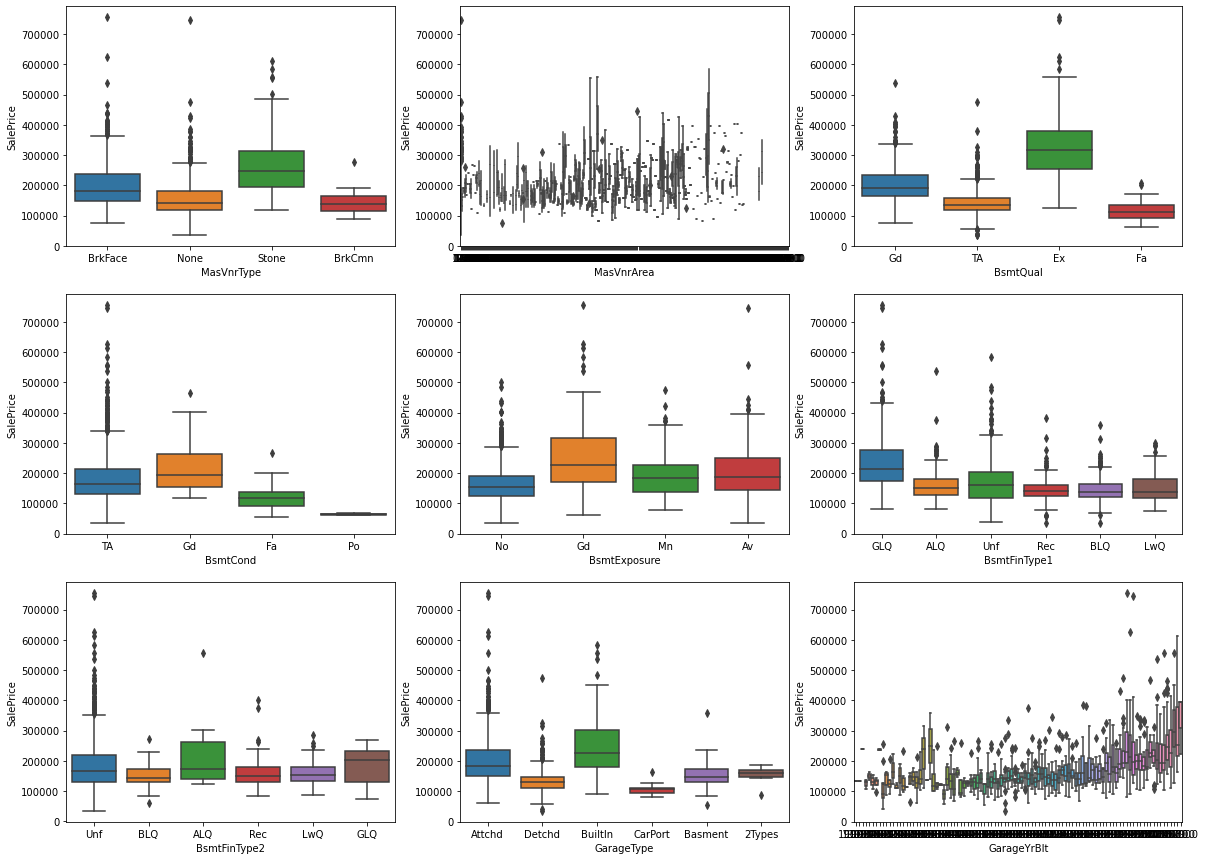

In [22]:
plt.figure(figsize=(20, 15))                                   #Take the figure size
plt.subplot(3,3,1)                                             #This is arrangement of image
sns.boxplot(data = house, x = 'MasVnrType', y = 'SalePrice')   #Using Seaborn, we plot the variables against target varible
plt.subplot(3,3,2)
sns.boxplot(data = house, x = 'MasVnrArea', y = 'SalePrice')
plt.subplot(3,3,3)
sns.boxplot(data = house, x = 'BsmtQual',y = 'SalePrice')
plt.subplot(3,3,4)
sns.boxplot(data = house, x = 'BsmtCond',y = 'SalePrice')
plt.subplot(3,3,5)
sns.boxplot(data = house, x = 'BsmtExposure',y = 'SalePrice')
plt.subplot(3,3,6)
sns.boxplot(data = house, x = 'BsmtFinType1',y = 'SalePrice')
plt.subplot(3,3,7)
sns.boxplot(data = house, x = 'BsmtFinType2',y = 'SalePrice')
plt.subplot(3,3,8)
sns.boxplot(data = house, x = 'GarageType',y = 'SalePrice')
plt.subplot(3,3,9)
sns.boxplot(data = house, x = 'GarageYrBlt',y = 'SalePrice')


plt.show()                                                     #Use this to showcase the images 

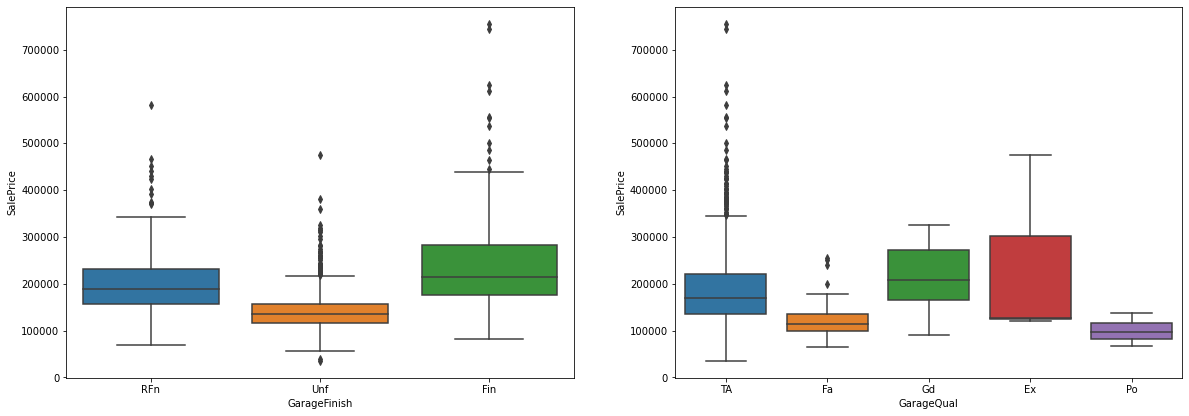

In [23]:
plt.figure(figsize=(20, 15))                                      #Take the figure size

plt.subplot(2,2,1)                                                #This is arrangement of image
sns.boxplot(data = house, x = 'GarageFinish',y = 'SalePrice')
plt.subplot(2,2,2)
sns.boxplot(data = house, x = 'GarageQual',y = 'SalePrice')

plt.show()                                                        #Use this to showcase the images 

### Comment

**Why did we plot these box plots without addressing the nullvalues in those columns?** Simple. We want to see if they influence the target variable-Sale price. If not, just sack them out of the data.


- In most of the basement-related variables, the seventy-five percentile of the **Sale price** isn't crossing 250K,   which isn't a great influence on the sale price of the houses. So let's drop them.
- **GarageQual** is of no use as well
- **MasVnrArea** is of no use as well

So drop these variables without addressing the null values in thier columns. It saves a lot of thinking for the following steps!

In [24]:
#Drop these columns

house.drop(['MasVnrArea', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageQual'], axis=1, inplace=True) 

In [25]:
house.shape #Check the shape of the data again

(1460, 52)

In [26]:
#Get the null value columns again

round(house.isnull().sum()[house.isnull().sum()>0]/len(house)*100, 2)

LotFrontage     17.74
MasVnrType       0.55
BsmtQual         2.53
BsmtCond         2.53
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
dtype: float64

### Comment

Finally, decide to remove **LotFrontage** as the percentage of missing values is more or less 20 percent of the data.



In [27]:
#Drop that column

house.drop('LotFrontage', axis=1, inplace=True)

In [28]:
#Check shape again

house.shape

(1460, 51)

In [29]:
#Impute Masonary veneer type. Check the data dictionary.

house["MasVnrType"] = house["MasVnrType"].astype("str")
house["MasVnrType"] = house["MasVnrType"].str.replace("nan", "None")



In [30]:
#Impute Basement quality. Check the data dictionary.

house["BsmtQual"] = house["BsmtQual"].fillna("None")


#Impute Basement condition. Check the data dictionary.

house["BsmtCond"] = house["BsmtCond"].fillna("None")


#Impute Garage Type. Check the data dictionary.

house["GarageType"] = house["GarageType"].astype("str")
house["GarageType"] = house["GarageType"].str.replace("nan", "No Garage")


#Impute Garage Finish. Check the data dictionary.

house["GarageFinish"] = house["GarageFinish"].astype("str")
house["GarageFinish"] = house["GarageFinish"].str.replace("nan", "No Garage")


In [31]:
#Check the null value columns again

round(house.isnull().sum()[house.isnull().sum()>0]/len(house)*100, 2)

GarageYrBlt    5.55
dtype: float64

In [32]:
house.dropna(axis='rows', inplace=True) #Since we can't replace the dates with something else. Dropped the rows.


In [33]:
house.shape #Check the shape again.

(1379, 51)

In [34]:
#Check the null values again

round(house.isnull().sum()[house.isnull().sum()>0]/len(house)*100, 2)

Series([], dtype: float64)

### Comment

Finally, there are no null value columns in the house data. Thank god!

## New columns

Now let's derive two new columns from years 

In [35]:
house['HouseAge'] = house.YrSold - house.YearBuilt #Creating a new column called 'HouseAge'

In [36]:
house['RemodelAge'] =  house.YearRemodAdd - house.YearBuilt #Remodel age of the house

In [37]:
house.shape #Check the shape of the data

(1379, 53)

In [38]:
#Now drop those two columns

house.drop(['YrSold','YearBuilt'], axis=1, inplace=True)

In [39]:
#Check the shape again for confirmation 

house.shape

(1379, 51)

# Step 3: Visualize the Data

Visualize the data so that we figure out the most correlated features and hence try to remove them.
Let's visualize the numerical variables and then the categorical variables using pairplots abd box plots.


### Visualizing the numerical variables

Let's find what are the numerical variables in the data. And make use of them for pairplots.


In [40]:
numvars = house[['LotArea', 'TotalBsmtSF', '1stFlrSF','2ndFlrSF', 'GrLivArea',
                'GarageArea', 'WoodDeckSF','OpenPorchSF','RemodelAge','HouseAge','SalePrice']] 

#Take only continuous variables

In [41]:
numvars.head()  #Get head of the house data

,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,RemodelAge,HouseAge,SalePrice
0,8450,856,856,854,1710,548,0,61,0,5,208500
1,9600,1262,1262,0,1262,460,298,0,0,31,181500
2,11250,920,920,866,1786,608,0,42,1,7,223500
3,9550,756,961,756,1717,642,0,35,55,91,140000
4,14260,1145,1145,1053,2198,836,192,84,0,8,250000


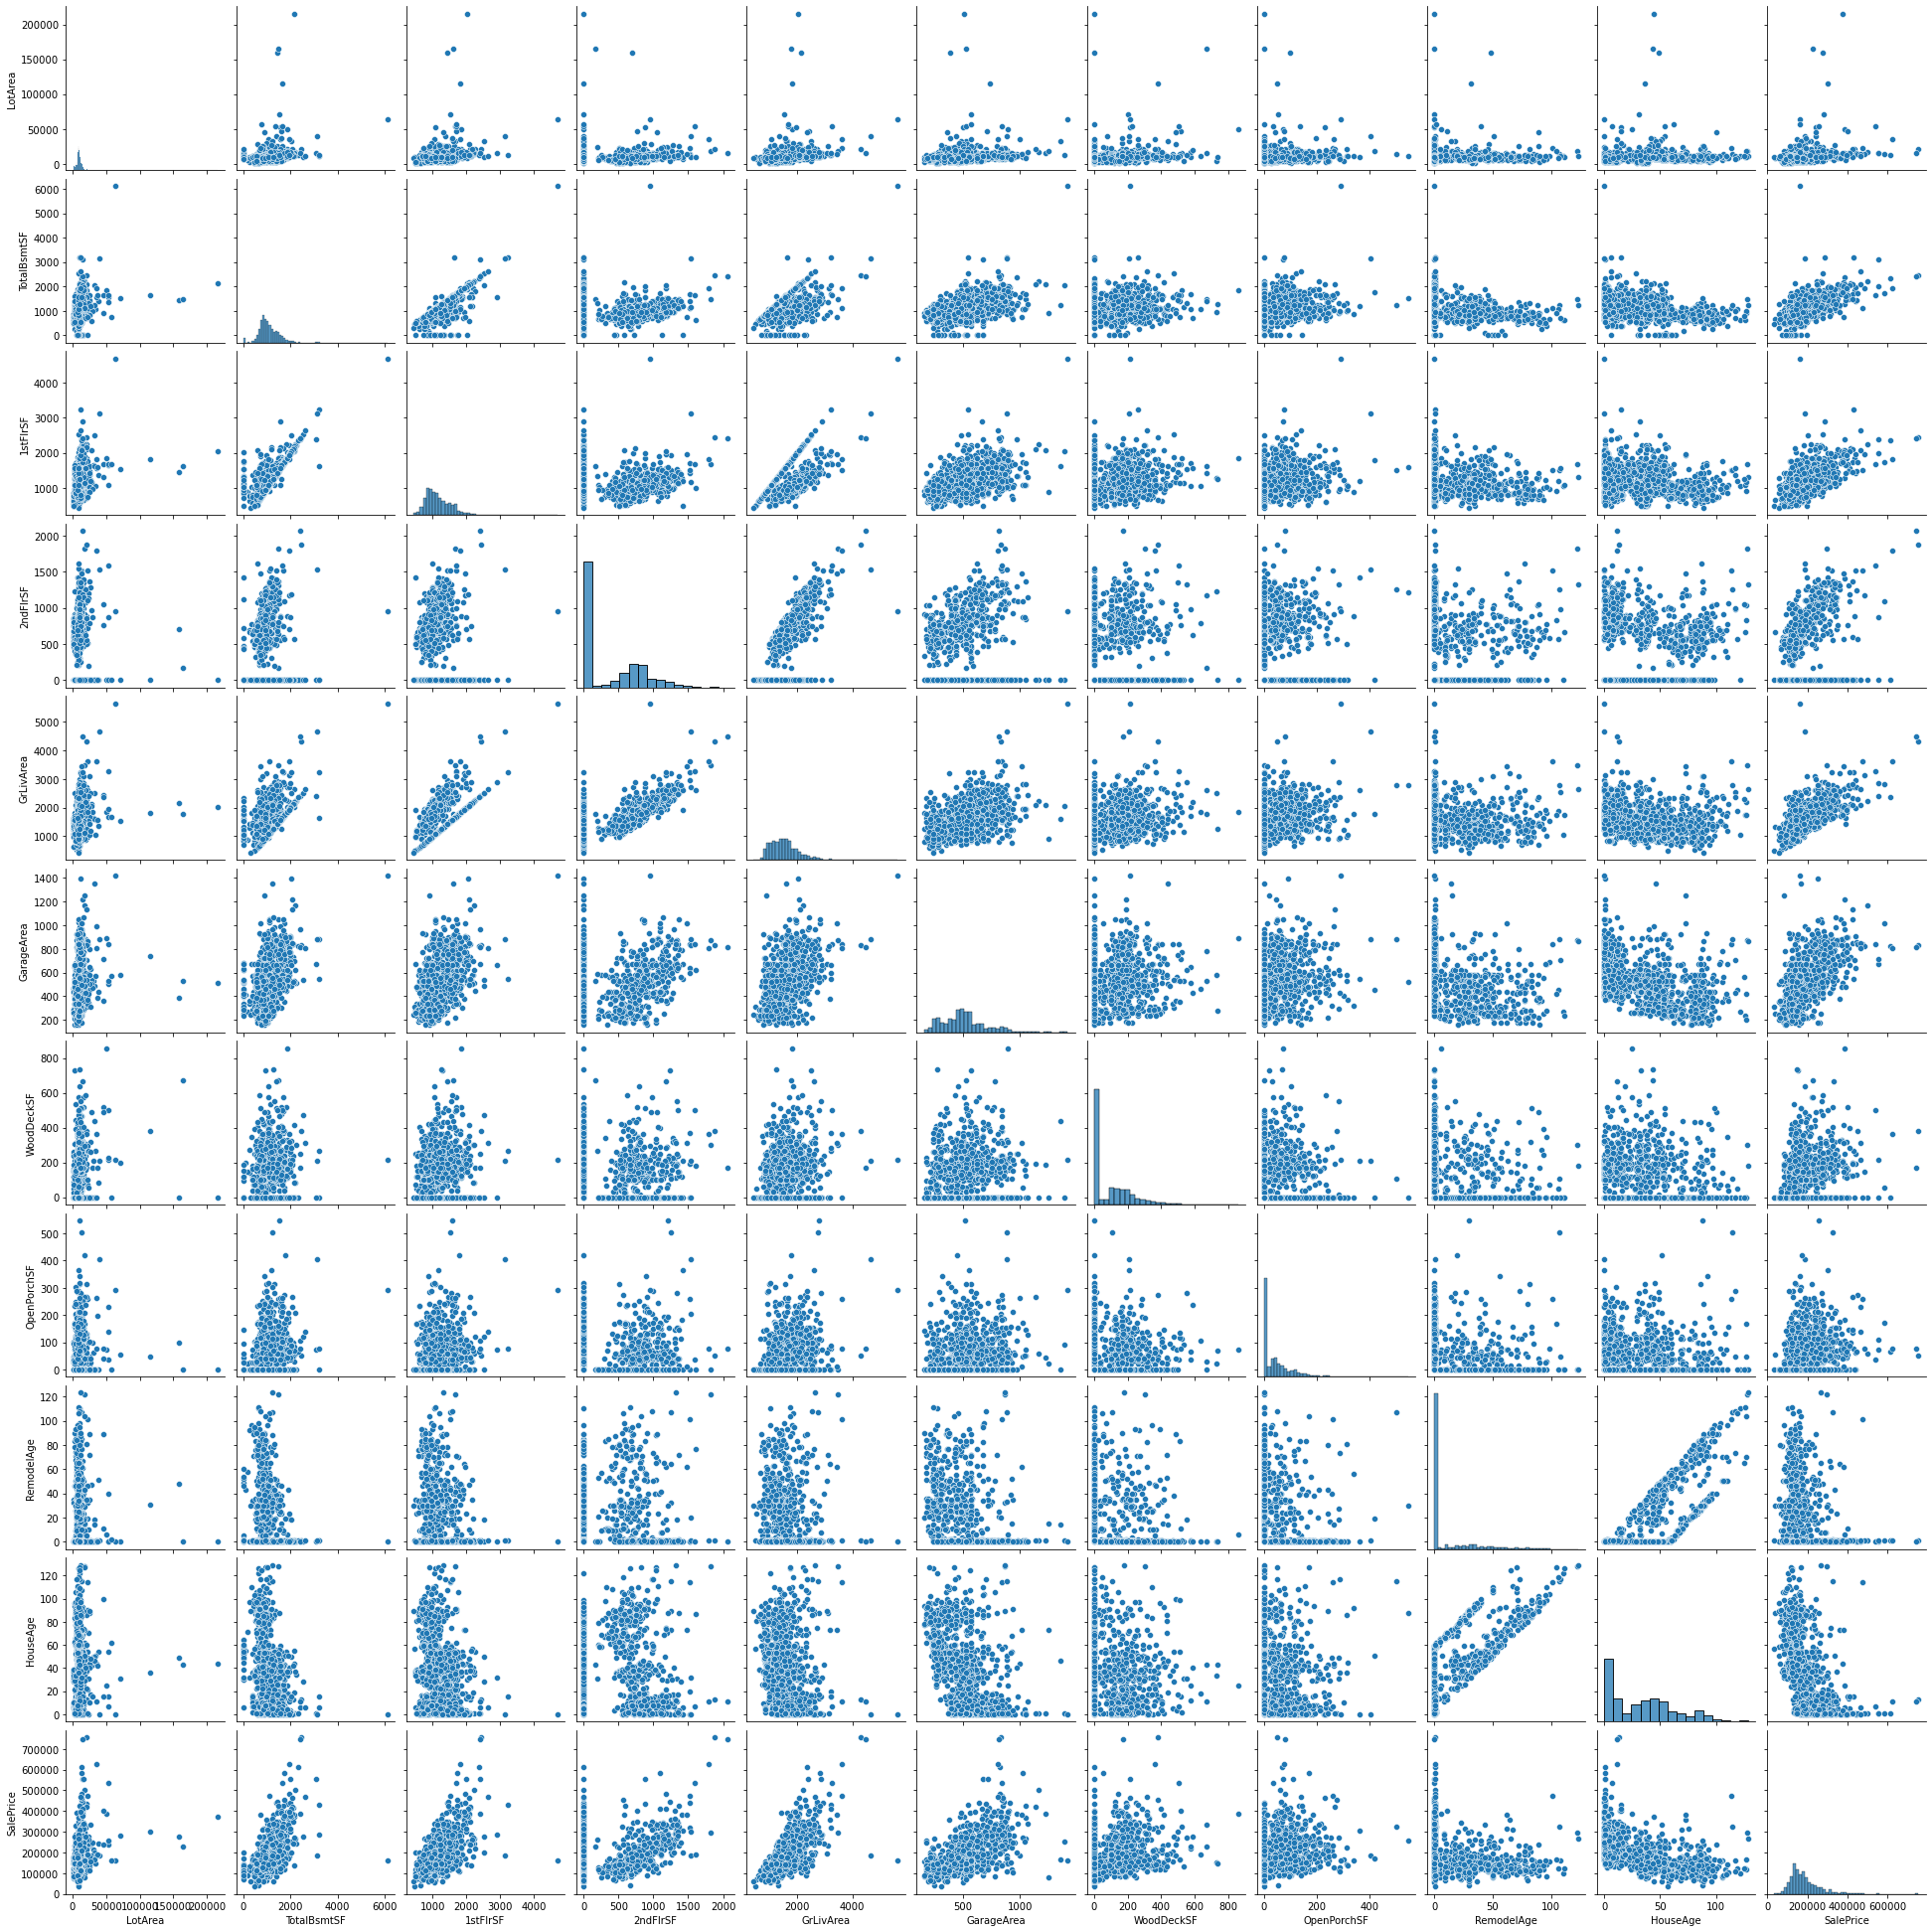

In [42]:
sns.pairplot(house, vars = numvars) #I am using Seaborn here for visualization
plt.show()   

### Comment

- The target variable **Sales price** is more correlated(that is it varies linearly) with **2ndFlrSF**, 
  **GrLivArea**, and **GarageArea**.
- Remodelling of the houses don't seem to be linear with the sale price of the houses

### Visualizing the categorical variables

Let's visualize some of the categorical variables and see how they influence the target variable.

In [43]:
house.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LandContour',
       'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearRemodAdd', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'SaleType', 'SaleCondition',
       'SalePrice', 'HouseAge', 'RemodelAge'],
      dtype='object')

In [44]:
catvars = house[['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
                'HouseStyle', 'OverallQual', 'OverallCond']]

catvars2 = house[['RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']]

catvars3 = house[['HeatingQC', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'EnclosedPorch', 'SaleType', 'SaleCondition']]

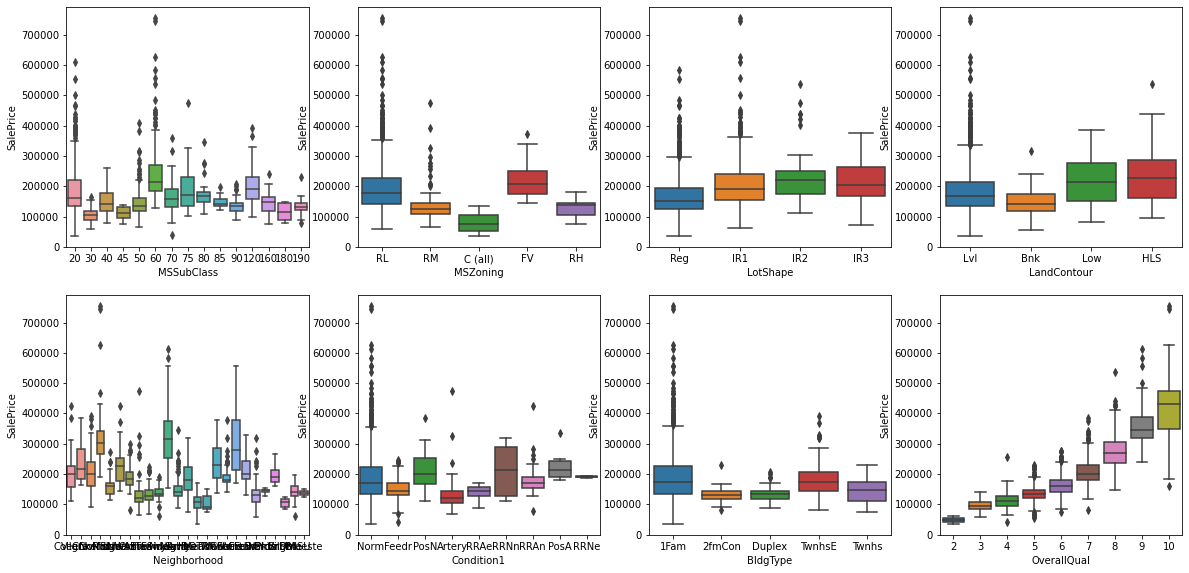

In [45]:
plt.figure(figsize=(20, 15))                                      #Take the figure size

plt.subplot(3,4,1)                                                #This is arrangement of image
sns.boxplot(data = house, x = 'MSSubClass', y = 'SalePrice')
plt.subplot(3,4,2)
sns.boxplot(data = house, x = 'MSZoning', y = 'SalePrice')

plt.subplot(3,4,3)
sns.boxplot(data = house, x = 'LotShape', y = 'SalePrice')

plt.subplot(3,4,4)
sns.boxplot(data = house, x = 'LandContour', y = 'SalePrice')


plt.subplot(3,4,5)
sns.boxplot(data = house, x = 'Neighborhood', y = 'SalePrice')

plt.subplot(3,4,6)
sns.boxplot(data = house, x = 'Condition1', y = 'SalePrice')
            

plt.subplot(3,4,7)
sns.boxplot(data = house, x = 'BldgType', y = 'SalePrice')
            

plt.subplot(3,4,8)
sns.boxplot(data = house, x = 'OverallQual', y = 'SalePrice')



plt.show()                                                        #Use this to showcase the images 

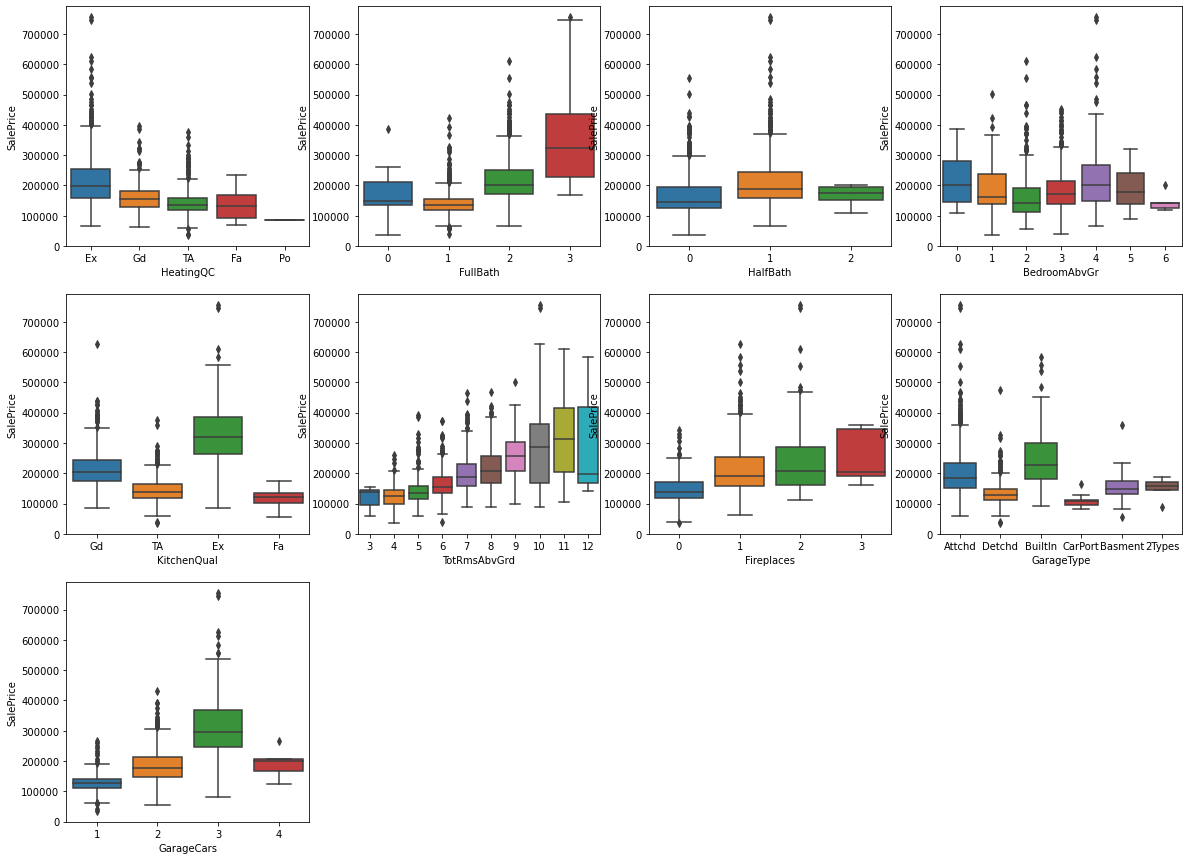

In [46]:
plt.figure(figsize=(20, 15))                                      #Take the figure size

plt.subplot(3,4,1)                                                #This is arrangement of image
sns.boxplot(data = house, x = 'HeatingQC', y = 'SalePrice')
plt.subplot(3,4,2)
sns.boxplot(data = house, x = 'FullBath', y = 'SalePrice')

plt.subplot(3,4,3)
sns.boxplot(data = house, x = 'HalfBath', y = 'SalePrice')

plt.subplot(3,4,4)
sns.boxplot(data = house, x = 'BedroomAbvGr', y = 'SalePrice')


plt.subplot(3,4,5)
sns.boxplot(data = house, x = 'KitchenQual', y = 'SalePrice')

plt.subplot(3,4,6)
sns.boxplot(data = house, x = 'TotRmsAbvGrd', y = 'SalePrice')
            

plt.subplot(3,4,7)
sns.boxplot(data = house, x = 'Fireplaces', y = 'SalePrice')
            

plt.subplot(3,4,8)
sns.boxplot(data = house, x = 'GarageType', y = 'SalePrice')

plt.subplot(3,4,9)
sns.boxplot(data = house, x = 'GarageCars', y = 'SalePrice')


plt.show()                                                        #Use this to showcase the images 

### Insights

Plotted the boxplots for the randomly chosen categorical variables.

- Overall quality of the houses has more influence on the sales prices of the same. 
- Full bath, kitchen quality, total rooms above grid, fireplaces, and garge cars have the strong influence on the 
  price tag of the houses.
  
Trivia:
- In the developed countries like Australia, each home will have 3 to 4 cars. So, obviously the houses with more 
  garage cars capability have the high price tag.
- Due to severe winters in the country, the houses with fireplaces tend to go for a higher price.

We can go on and on talking about each feature. But we'll be stuck here only! Let's move on.

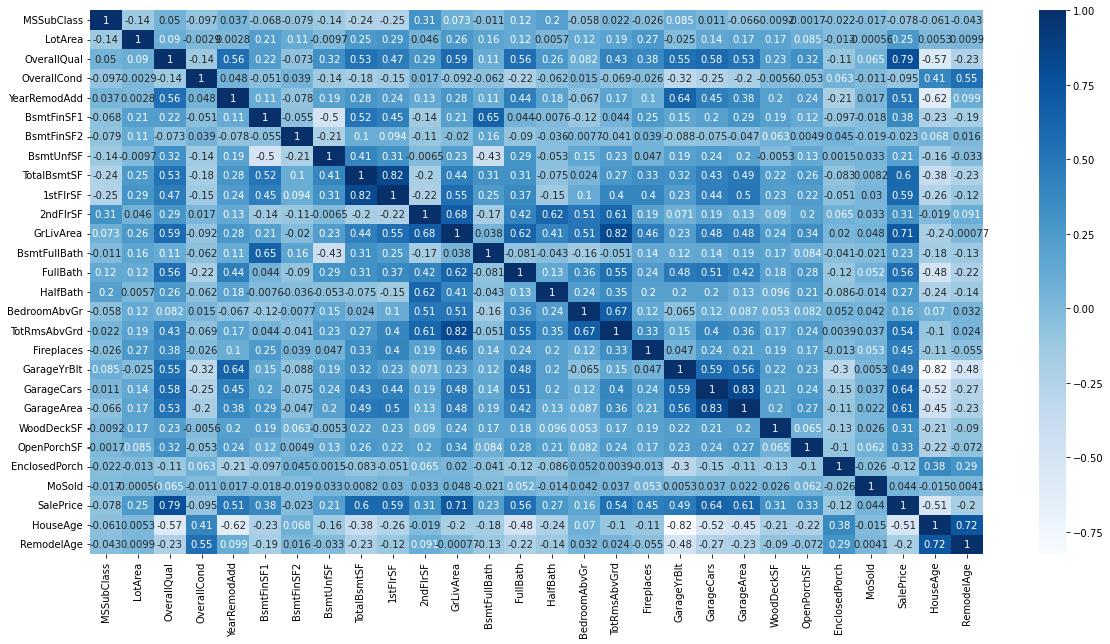

In [47]:
plt.figure(figsize = (20, 10))                          #Let's have a correlation matrix for these variables
sns.heatmap(house.corr(), annot = True, cmap="Blues")
plt.show()

### Comment

The target variable, Sale price, is more correlated with: Overall quality, GrLivingArea, Garage area, Total basementSF, and HouseAge.

# Step 3: Data Preparation

In this steps, we prepare the the data to new columns if there is any possibility. And also we proceed to create dummy variables, which is called **One Hot Encoding**.

In [48]:
#Create a new column called Garage Age from the Garage Year Built

house['GarageAge'] = house['GarageYrBlt'].apply(lambda x: 1 if x>=2000 else 0)

In [49]:
#Drop these columns from the house data. The month of house sold seems to be redundant.

house.drop(['YearRemodAdd', 'GarageYrBlt', 'MoSold'], axis =1, inplace=True)

In [50]:
#Check the shape of the data again

house.shape

(1379, 49)

In [51]:
#Get the head of the data to convert some categorical values

house.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,SaleType,SaleCondition,SalePrice,HouseAge,RemodelAge,GarageAge
0,60,RL,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,...,548,0,61,0,WD,Normal,208500,5,0,1
1,20,RL,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,...,460,298,0,0,WD,Normal,181500,31,0,0
2,60,RL,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,...,608,0,42,0,WD,Normal,223500,7,1,1
3,70,RL,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,...,642,0,35,272,WD,Abnorml,140000,91,55,0
4,60,RL,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,...,836,192,84,0,WD,Normal,250000,8,0,1


In [52]:
#Get columns of the data

house.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LandContour',
       'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'SaleType',
       'SaleCondition', 'SalePrice', 'HouseAge', 'RemodelAge', 'GarageAge'],
      dtype='object')

In [53]:
#Change the values of ordinals

house[['LotShape', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'GarageFinish']].head()

,LotShape,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,GarageFinish
0,Reg,Gd,TA,Gd,TA,Ex,Gd,RFn
1,Reg,TA,TA,Gd,TA,Ex,TA,RFn
2,IR1,Gd,TA,Gd,TA,Ex,Gd,RFn
3,IR1,TA,TA,TA,Gd,Gd,Gd,Unf
4,IR1,Gd,TA,Gd,TA,Ex,Gd,RFn


In [54]:
house['LotShape'] = house['LotShape'].astype('category')       #Keeping the variables as 'category'
house['ExterQual'] = house['ExterQual'].astype('category')
house['ExterCond'] = house['ExterCond'].astype('category')
house['BsmtQual'] = house['BsmtQual'].astype('category')
house['BsmtCond'] = house['BsmtCond'].astype('category')
house['HeatingQC'] = house['HeatingQC'].astype('category')
house['KitchenQual'] = house['KitchenQual'].astype('category')
house['GarageFinish'] = house['GarageFinish'].astype('category')

In [55]:
#Lot shape
house['LotShape'] = house.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

# External quality
house['ExterQual'] = house.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

#External condition
house['ExterCond'] = house.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

#Basement quality
house['BsmtQual'] = house.BsmtQual.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

#Basement condition
house['BsmtCond'] = house.BsmtCond.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

#HeatingQC
house['HeatingQC'] = house.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

#Kitchen quality
house['KitchenQual'] = house.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

#Garage finish
house['GarageFinish'] = house.GarageFinish.map({'No Garage':0,'Unf':1,'RFn':2,'Fin':3})


In [56]:
house[['LotShape', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'GarageFinish']].head()

,LotShape,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,GarageFinish
0,3,3,2,4,3,4,3,2
1,3,2,2,4,3,4,2,2
2,0,3,2,4,3,4,3,2
3,0,2,2,3,4,3,3,1
4,0,3,2,4,3,4,3,2


### Comment

We have changed some of the values of some of the variables to ordinals. So we will have the dummy values for the remaining vategorical variables.

In [57]:
#The cat variables for which we will have the dummies

house[['MSZoning','LandContour','LotConfig','Condition1','BldgType',
             'HouseStyle','RoofStyle','Exterior1st',  'Exterior2nd','MasVnrType','Foundation','Neighborhood',
            'GarageType','SaleType','SaleCondition']].head()

,MSZoning,LandContour,LotConfig,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,Foundation,Neighborhood,GarageType,SaleType,SaleCondition
0,RL,Lvl,Inside,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,CollgCr,Attchd,WD,Normal
1,RL,Lvl,FR2,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,None,CBlock,Veenker,Attchd,WD,Normal
2,RL,Lvl,Inside,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,CollgCr,Attchd,WD,Normal
3,RL,Lvl,Corner,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,BrkTil,Crawfor,Detchd,WD,Abnorml
4,RL,Lvl,FR2,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,NoRidge,Attchd,WD,Normal


### Create dummy variables

Make dummies and remove the first for all these variables.

In [58]:
MSZonings = pd.get_dummies(house['MSZoning'], drop_first=True)              #Dummy variables for MSZoning
LandContours = pd.get_dummies(house['LandContour'], drop_first=True)         #Dummy variables for LandContour
LotConfigs = pd.get_dummies(house['LotConfig'], drop_first=True)            #Dummy variables for LotConfig
Condition1s = pd.get_dummies(house['Condition1'], drop_first=True)         #Dummy variables for Condition1
BldgTypes = pd.get_dummies(house['BldgType'], drop_first=True)             #Dummy variables for Building type
HouseStyles = pd.get_dummies(house['HouseStyle'], drop_first=True)         #Dummy variables for House style
RoofStyles = pd.get_dummies(house['RoofStyle'], drop_first=True)           #Dummy variables for Roof style
Exterior1sts = pd.get_dummies(house['Exterior1st'], drop_first=True)         #Dummy variables for Exterior first
Exterior2nds = pd.get_dummies(house['Exterior2nd'], drop_first=True)         #Dummy variables for Exterior second
MasVnrTypes = pd.get_dummies(house['MasVnrType'], drop_first=True)         #Dummy variables for Masonary veneer type
Foundations = pd.get_dummies(house['Foundation'], drop_first=True)         #Dummy variables for Foundation
Neighborhoods = pd.get_dummies(house['Neighborhood'], drop_first=True)         #Dummy variables for Neighbourhood
GarageTypes = pd.get_dummies(house['GarageType'], drop_first=True)         #Dummy variables for Garage type
SaleTypes = pd.get_dummies(house['SaleType'], drop_first=True)             #Dummy variables for Sale type
SaleConditions = pd.get_dummies(house['SaleCondition'], drop_first=True)     #Dummy variables for Sale condition


In [59]:
house = pd.concat([house, MSZonings, LandContours, LotConfigs, Condition1s, BldgTypes, HouseStyles, RoofStyles, Exterior1sts, 
                  Exterior2nds, MasVnrTypes, Foundations, Neighborhoods, GarageTypes, SaleTypes, SaleConditions], axis = 1)


In [60]:
house.head() #Get the head after concating the dummies to the main data

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,RL,8450,3,Lvl,Inside,CollgCr,Norm,1Fam,2Story,...,0,0,0,0,1,0,0,0,1,0
1,20,RL,9600,3,Lvl,FR2,Veenker,Feedr,1Fam,1Story,...,0,0,0,0,1,0,0,0,1,0
2,60,RL,11250,0,Lvl,Inside,CollgCr,Norm,1Fam,2Story,...,0,0,0,0,1,0,0,0,1,0
3,70,RL,9550,0,Lvl,Corner,Crawfor,Norm,1Fam,2Story,...,0,0,0,0,1,0,0,0,0,0
4,60,RL,14260,0,Lvl,FR2,NoRidge,Norm,1Fam,2Story,...,0,0,0,0,1,0,0,0,1,0


In [61]:
# Drop the the columns for which we have  dummies

house.drop(['MSZoning', 'LandContour', 'LotConfig', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 
                  'Exterior2nd', 'MasVnrType', 'Foundation', 'Neighborhood', 'GarageType', 'SaleType', 'SaleCondition'], axis =1, inplace=True)

In [62]:
#Let's check the head of the house data

house.head()

,MSSubClass,LotArea,LotShape,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,8450,3,7,5,3,2,4,3,706,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,3,6,8,2,2,4,3,978,...,0,0,0,0,1,0,0,0,1,0
2,60,11250,0,7,5,3,2,4,3,486,...,0,0,0,0,1,0,0,0,1,0
3,70,9550,0,7,5,2,2,3,4,216,...,0,0,0,0,1,0,0,0,0,0
4,60,14260,0,8,5,3,2,4,3,655,...,0,0,0,0,1,0,0,0,1,0


# Step 4: Split Data into Train and Test

In this step, we will separate the data for training and testing purpose.
- Split the data
- Scale the data (the numerical ones)
- Visualize the data

Note: Import the libraries.


### Split the data as Train and Test

In [63]:
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error

In [64]:
# From sklear train_test_split function

house_train, house_test = train_test_split (house, train_size = 0.7, random_state = 100)
print(house_train.shape)
print(house_test.shape)

(965, 147)
(414, 147)


### Scale the Data (the numerical columns)

By scaling, we bring the numerical values between 0 and 1.

In [65]:
#Get the head of the train data

house_train.head()

,MSSubClass,LotArea,LotShape,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
1269,50,11344,3,5,5,2,2,3,3,460,...,0,0,0,0,1,0,0,0,1,0
284,120,8012,3,6,5,3,2,4,3,430,...,0,0,0,0,1,0,0,0,1,0
200,20,8546,3,4,5,2,2,4,3,0,...,0,0,0,0,1,0,0,0,1,0
112,60,9965,3,7,5,3,2,5,3,984,...,0,0,1,0,0,0,0,0,0,1
1240,60,8158,3,7,5,3,2,4,3,550,...,0,0,0,0,1,0,0,0,1,0


In [66]:
house_train.columns #Get the columns

Index(['MSSubClass', 'LotArea', 'LotShape', 'OverallQual', 'OverallCond',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinSF1',
       ...
       'ConLI', 'ConLw', 'New', 'Oth', 'WD', 'AdjLand', 'Alloca', 'Family',
       'Normal', 'Partial'],
      dtype='object', length=147)

In [67]:
#Let's scale the variables

scaler = MinMaxScaler()
num_vars = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF','2ndFlrSF', 'GrLivArea',
                'GarageArea', 'WoodDeckSF','OpenPorchSF','RemodelAge','HouseAge','SalePrice']

house_train[num_vars] = scaler.fit_transform(house_train[num_vars]) #scaling done
house_test[num_vars] = scaler.transform(house_test[num_vars])



In [68]:
#Get the head of the data now

house_train.head()

,MSSubClass,LotArea,LotShape,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
1269,0.176471,0.046947,3,0.375,0.333333,2,2,3,3,0.081502,...,0,0,0,0,1,0,0,0,1,0
284,0.588235,0.031373,3,0.500,0.333333,3,2,4,3,0.076187,...,0,0,0,0,1,0,0,0,1,0
200,0.000000,0.033869,3,0.250,0.333333,2,2,4,3,0.000000,...,0,0,0,0,1,0,0,0,1,0
112,0.235294,0.040501,3,0.625,0.333333,3,2,5,3,0.174344,...,0,0,1,0,0,0,0,0,0,1
1240,0.235294,0.032055,3,0.625,0.333333,3,2,4,3,0.097449,...,0,0,0,0,1,0,0,0,1,0


### Visualize the data

Let's see how the train data especially the target variable, **Sale price**. Why? If we go for the heatmap, it comes something like a painting picture drawn by elementary school kid. That's because of the number of variables.

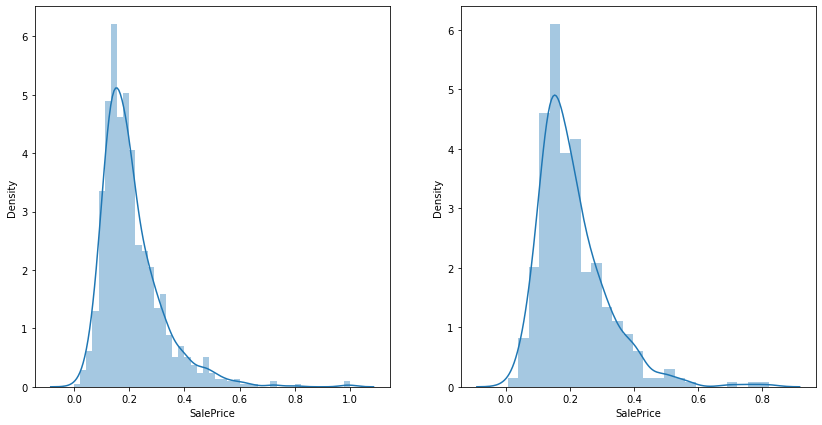

In [69]:
plt.figure(figsize=(14, 7))               #Take the figure size
plt.subplot(1, 2, 1)                      #The order number
sns.distplot(house_train.SalePrice)       #For train set 
plt.subplot(1, 2, 2)
sns.distplot(house_test.SalePrice)        #For test set

plt.show()

So far so good! Now let's go and build the model.

# Step 5: Model Building

In this step, we will:

- Pop the target variable
- Build Linear Regression model using RFE


In [70]:
# Pop the variable Sale price

y_train = house_train.pop('SalePrice')    #That means we make 'Sale price' as a dependent variable
X_train = house_train

y_test = house_test.pop('SalePrice')
X_test = house_test


In [71]:
#Let's build the model using RFE with 50

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator = lm, n_features_to_select =50)             #Run the RFE
rfe = rfe.fit(X_train, y_train)

In [72]:
y_pred_lr = lm.predict(X_train)                #Predictied values
print(r2_score(y_train, y_pred_lr))            #We get R2 score

RSS = np.sum(np.square(y_train-y_pred_lr))  
print(RSS)                                     # We get RSS

MSE = mean_squared_error(y_train, y_pred_lr)
print(MSE)                                     # We get MSE

#RMSE
print(MSE*0.5)                                 # We get RMSE

0.8811349776981299
1.4103420235163466
0.0014614943248874059
0.0007307471624437029


### Comment

We got a pretty decent R2 score!

Let's plot the residual errors on the plot!

<Figure size 432x288 with 0 Axes>

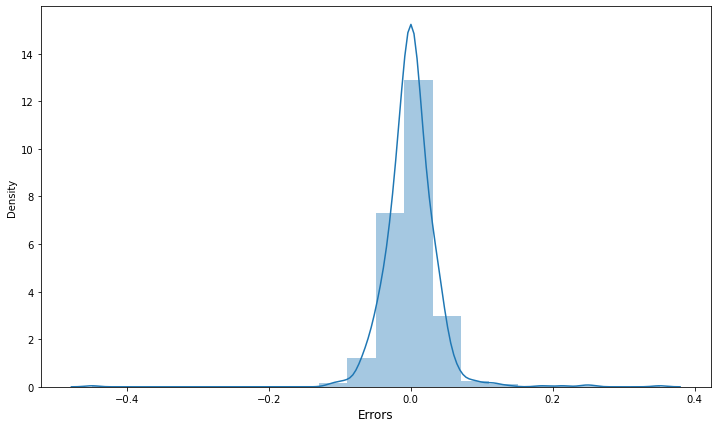

In [73]:
y_pred_lr = lm.predict(X_train)
res = y_train - y_pred_lr

# Plot the error on the histogram
fig = plt.figure()
plt.figure(figsize = (12, 7))
sns.distplot((res), bins = 20)
fig.suptitle("Residual Error Terms", fontsize = 14)                  # Give the heading 
plt.xlabel('Errors', fontsize = 12)                                  #Give the x label and its font size

plt.show()

### Comment

The error terms observe the normal distribution.

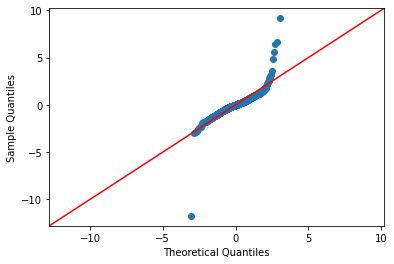

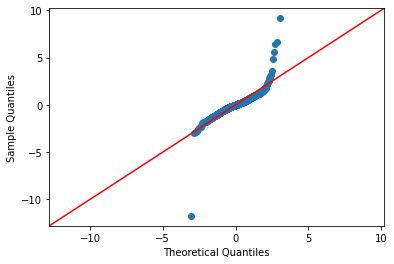

In [74]:
sm.qqplot(res, fit=True,line='45')  #Get Q-Q plot for the same 'res'


### Residual vs Predicted Values

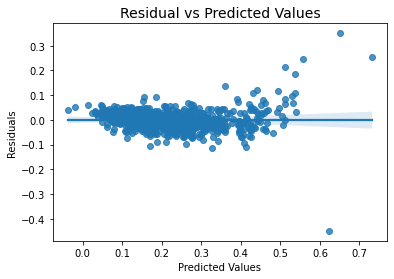

In [75]:
#Let's plot Regplot for pattern identification

sns.regplot(x = y_pred_lr, y = res)                                     #Choose x and y and the rest is familiar
plt.title('Residual vs Predicted Values', fontdict = {'fontsize': 14})
plt.xlabel('Predicted Values', fontdict = {'fontsize': 10})
plt.ylabel('Residuals', fontdict = {'fontsize': 10})
plt.show()

The most of the values are spread close to the line passing through zero.

Let' go back to the RFE and find out the columns it selected to proceed further.

In [76]:
col = X_train.columns[rfe.support_]
rfe_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
rfe_df = rfe_df.loc[rfe_df['rfe_support'] == True]
rfe_df.reset_index(drop=True, inplace=True)

rfe_df



,Variable,rfe_support,rfe_ranking
0,MSSubClass,True,1
1,LotArea,True,1
2,OverallQual,True,1
3,OverallCond,True,1
4,BsmtFinSF1,True,1
5,1stFlrSF,True,1
6,GrLivArea,True,1
7,GarageCars,True,1
8,GarageArea,True,1
9,FV,True,1


### Comment

- The features selected by RFE are ranked as **1**
- The features it ignores are **False** and hence they are ignored

In [77]:
#Let's display the columns of the house train dataset

X_train = X_train[col]
X_test = X_test[col]


In [78]:
print(X_train.shape)
print(X_test.shape)


(965, 52)
(414, 52)


# Ridge Model

In [79]:
# Alphas for the model

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()


# Cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring = 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score = True,
                        verbose = 1)      

ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [80]:
# The best hyperparameter alpha

print(ridge_model_cv.best_params_)

{'alpha': 1.0}


### Comment

We got the best alpha value, the hyperparameter.

In [81]:
#Fit the data to ridge


ridge = Ridge(alpha = 1)     #That's the value of best choice
ridge.fit(X_train, y_train)
print(ridge.coef_)

[-0.04808585  0.09400094  0.20160046  0.04939394  0.14805514  0.07267131
  0.27884206  0.03289993 -0.01004906  0.01831993  0.0128507   0.02618296
  0.0150236   0.03766971  0.03762391  0.0230837  -0.01263434 -0.0260857
 -0.03029504  0.01588107 -0.00383946  0.00423554  0.00394136 -0.02043429
 -0.00698643 -0.01884761 -0.02983766 -0.02647849 -0.01904126  0.04122847
  0.          0.05553706 -0.01493019 -0.0421236  -0.0215459   0.01370525
  0.03565053  0.01715709  0.07846538  0.06619     0.0259675   0.05949917
  0.02205672  0.02417666  0.03854596  0.01365078  0.01326157  0.05256437
  0.04655091  0.02251624 -0.02708349 -0.01415954]


In [82]:
#Display the mean scores

ridge_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_results = ridge_results[ridge_results['param_alpha']<=500]
ridge_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
12,1.0,-0.027359,-0.029806,1
11,0.9,-0.027328,-0.029814,2
10,0.8,-0.027295,-0.029828,3
9,0.7,-0.027259,-0.029851,4
13,2.0,-0.027707,-0.029876,5
8,0.6,-0.027221,-0.029879,6
7,0.5,-0.027183,-0.029909,7
6,0.4,-0.027144,-0.029949,8
5,0.3,-0.027107,-0.030008,9
14,3.0,-0.028102,-0.030068,10


In [83]:
#Get R2 the Train and Test  data sets

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metrics=[]                                              #R2 score for the Train set
r2_train = r2_score(y_train, y_pred_train )
print("R2_train:")
print(r2_train)
metrics.append(r2_train)

r2_test = r2_score(y_test, y_pred_test)               #R2 score for the Test set
print("R2_test:")
print(r2_test)
metrics.append(r2_test)

rss_train= np.sum(np.square(y_train - y_pred_train))   #RSS for the Train set
print("RSS_train:")
print(rss_train)
metrics.append(rss_train)

rss_test = np.sum(np.square(y_test - y_pred_test))      #RSS for the Test set 
print("RSS_test:")
print(rss_test)
metrics.append(rss_test)

mse_train= mean_squared_error(y_train, y_pred_train)    #MSE for the Train set
print("MSE_train:")
print(mse_train)
metrics.append(mse_train)

mse_test= mean_squared_error(y_test , y_pred_test)   #MSE for the Test set
print("MSE_test:")
print(mse_test)
metrics.append(mse_test)

R2_train:
0.8484572327330828
R2_test:
0.7973658890793922
RSS_train:
1.7980658136226861
RSS_test:
0.9623095534866406
MSE_train:
0.0018632806358784312
MSE_test:
0.0023244192113203877


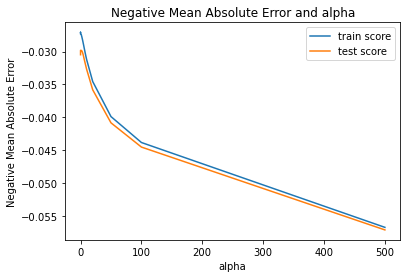

In [84]:
# plotting mean test and train scoes with alpha 

ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [85]:
#Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(3)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,MSSubClass,-0.048
1,LotArea,0.094
2,OverallQual,0.202
3,OverallCond,0.049
4,BsmtFinSF1,0.148
5,1stFlrSF,0.073
6,GrLivArea,0.279
7,GarageCars,0.033
8,GarageArea,-0.010
9,FV,0.018


In [86]:
#Get top 10 parameters from ridge

model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train[ridge_df.Features]

ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']
ridge_coef.sort_values(by='Coef', ascending=False).head(10)

,Feaure,Coef
7,GarageCars,0.278842
3,OverallCond,0.201600
5,1stFlrSF,0.148055
2,OverallQual,0.094001
39,BrDale,0.078465
6,GrLivArea,0.072671
40,Crawfor,0.066190
42,NoRidge,0.059499
32,ImStucc,0.055537
48,BuiltIn,0.052564


# Lasso Regression

In [87]:
#Let's use the Lasso Regression now

lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))



0.7942058590094029
0.7656500362757113


In [88]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [89]:
print(lasso_model_cv.best_params_)


{'alpha': 0.0001}


In [90]:
lasso = Lasso(alpha=0.0001)      #Optimal alpha
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [91]:
lasso.coef_


array([-4.05567495e-02,  9.25427086e-02,  2.07697730e-01,  4.58096977e-02,
        1.56435209e-01,  0.00000000e+00,  3.76511769e-01,  2.81110514e-02,
       -4.75667280e-04,  0.00000000e+00, -0.00000000e+00,  9.75235264e-03,
       -0.00000000e+00,  3.07748464e-02,  3.16804408e-02,  1.73509113e-02,
       -0.00000000e+00, -2.58392462e-02, -1.56738761e-02,  4.31073310e-03,
        9.57918000e-03,  9.92739379e-03,  1.29582123e-02, -1.65029140e-03,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  2.05436525e-02,  0.00000000e+00,  4.67231014e-02,
       -5.87457342e-03, -5.10080424e-02, -0.00000000e+00,  2.33998549e-03,
        3.14608415e-02,  7.55981421e-03,  7.13565285e-02,  6.32942817e-02,
        2.47757315e-02,  5.31428141e-02,  6.70428665e-03,  0.00000000e+00,
        1.75876680e-02,  0.00000000e+00, -1.08340408e-04,  2.81048926e-02,
        3.29016896e-02,  0.00000000e+00, -2.23274759e-02,  0.00000000e+00])

In [92]:
#Print R2 for test and train sets in Lasso

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metrics=[]
r2_train= r2_score(y_train,y_pred_train )       #Train set R2 score
print("r2_train:")
print(r2_train)
metrics.append(r2_train)

r2_test = r2_score(y_test, y_pred_test)             #Test set R2 score
print("r2_test:")
print(r2_test)
metrics.append(r2_test)


rss_train = np.sum(np.square(y_train-y_pred_train))       #Train set RSS score
print("RSS_train:")
print(rss_train)
metrics.append(rss_train)

rss_test = np.sum(np.square(y_test - y_pred_test))           #Test set RSS score
print("RSS_test:")
print(rss_test)
metrics.append(rss_test)

mse_train = mean_squared_error(y_train,y_pred_train)     #Train set MSE score
print("MSE_train:")
print(mse_train)
metrics.append(mse_train)

mse_test = mean_squared_error(y_test , y_pred_test)          #Test set MSE score
print("MSE_test:")
print(mse_test)
metrics.append(mse_test)

r2_train:
0.8474480564119092
r2_test:
0.8035975280369424
RSS_train:
1.8100397631271423
RSS_test:
0.9327154951344432
MSE_train:
0.0018756888737068832
MSE_test:
0.0022529359785856116


In [93]:
cv_result_lsso = pd.DataFrame(lasso_model_cv.cv_results_)
cv_result_lsso['param_alpha'] = cv_result_lsso['param_alpha'].astype('float32')
cv_result_lsso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004911,0.002063,0.001643,0.000492,0.0001,{'alpha': 0.0001},-0.029472,-0.030775,-0.031956,-0.028701,...,-0.029363,0.002053,1,-0.027195,-0.027393,-0.026024,-0.027846,-0.028178,-0.027327,0.000737
1,0.002727,0.000037,0.001349,0.000038,0.0010,{'alpha': 0.001},-0.033871,-0.032391,-0.033629,-0.033765,...,-0.032642,0.001634,2,-0.031468,-0.032510,-0.029472,-0.032029,-0.032722,-0.031640,0.001167
2,0.002460,0.000040,0.001336,0.000036,0.0100,{'alpha': 0.01},-0.055267,-0.057257,-0.055843,-0.060087,...,-0.056320,0.002302,3,-0.055776,-0.056113,-0.055839,-0.055958,-0.057333,-0.056204,0.000576
3,0.002496,0.000229,0.001482,0.000273,0.1000,{'alpha': 0.1},-0.078538,-0.086265,-0.079112,-0.083096,...,-0.079644,0.005068,4,-0.079277,-0.077900,-0.079685,-0.079021,-0.082146,-0.079606,0.001401
4,0.002319,0.000132,0.001551,0.000498,0.2000,{'alpha': 0.2},-0.078538,-0.086265,-0.079112,-0.083096,...,-0.079644,0.005068,4,-0.079277,-0.077900,-0.079685,-0.079021,-0.082146,-0.079606,0.001401


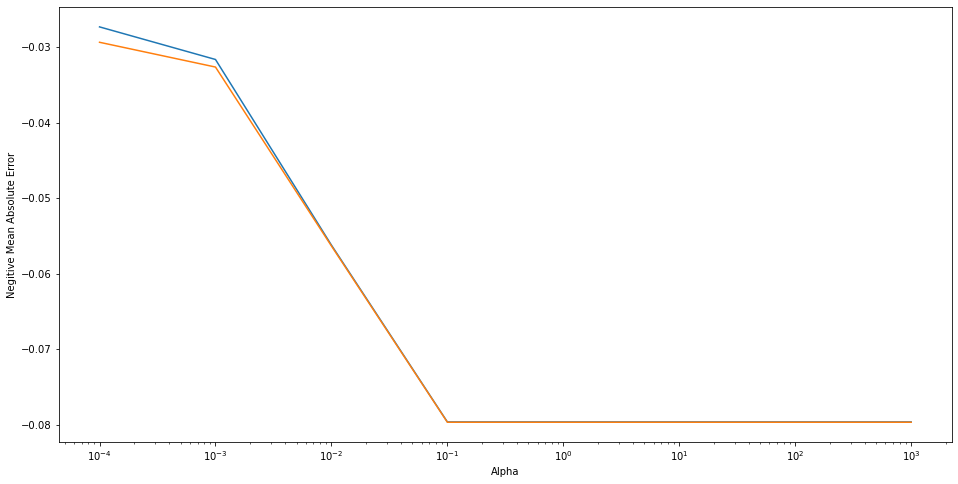

In [94]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_lsso['param_alpha'],cv_result_lsso['mean_train_score'])   #Plot the results to see
plt.plot(cv_result_lsso['param_alpha'],cv_result_lsso['mean_test_score'])
plt.xscale('log')
plt.ylabel('Negitive Mean Absolute Error')
plt.xlabel('Alpha')
plt.show()

In [95]:
#Check for the alpha 0.001

lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.7942058590094029
0.7656500362757113


### Comment

Lasso Regression with alpha value = 0.001 is not a good model

In [96]:
#Check for the alpha 0.0001

lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8474480564119092
0.8035975280369424


So get the features for the alpha value 0.0001!

In [97]:
#Get the features

model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = house_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Features','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Features,Coef
7,BsmtQual,0.376512
3,OverallQual,0.207698
5,ExterQual,0.156435
2,LotShape,0.092543
39,Lvl,0.071357
40,CulDSac,0.063294
42,FR3,0.053143
32,GarageAge,0.046723
4,OverallCond,0.045810
49,RRAn,0.032902


In [98]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,MSSubClass,-0.0406
1,LotArea,0.0925
2,OverallQual,0.2077
3,OverallCond,0.0458
4,BsmtFinSF1,0.1564
5,GrLivArea,0.3765
6,GarageCars,0.0281
7,GarageArea,-0.0005
8,RL,0.0098
9,HLS,0.0308


### Results comparison

Comparing the results of both Ridge and Lasso:

**Ridge:**

- R2 score Train: 84.8 percent
- R2 score Test: 79.7 Percent
- RSS for Train data: 1.798
- RSS for Test data:  0.962 
- MSE for Train data: 0.0018 
- MSE for Test data:  0.0023

**Lasso:**

- R2 score Train: 84.7 percent
- R2 score Test: 80.3 Percent
- RSS for Train data: 1.811
- RSS for Test data:  0.933
- MSE for Train data: 0.0018 
- MSE for Test data:  0.0022

**Optimal Alpha Values**

- Alpha = 1.0 in Ridge
- Alpha = 0.0001 in Lasso

 ### Conclusion Comments
 
Except R2 score value, the rest of the values are almost the same. The R2 scores are better in the Lasso Regression.

Since the Lasso Regression fares better than the Ridge Regression, let's consider the features from the Lasso.
The top ten features that best explain the target variabl are:

- The basement quality (BsmtQual)
- The overall quality of house (OverallQual)
- The exterior quality (ExterQual)
- The lot shape (LotShape)
- The level of the house (Lvl). That is the land contour will play the role.
- CulDSac. Lot configuration plays a role in the sale price.
- FR3. That is lot configuration with frontage on 3 side of the property plays a role.
- GarageAge
- Overall condition
- RRAn. That is the conditions like North-South rail road play a role.

                                       ** The End **

# Subjective Questions

### Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

The optimal values of alpha for Ridge and Lasso are respectively: **1.0 and 0.0001.**

When you double the values, we get: **2.0 and 0.0002**

In [99]:
#Let's try Ridge Regression

ridge = Ridge(alpha = 2.0)
ridge.fit(X_train, y_train)
print(ridge.coef_)

[-0.04541365  0.0754918   0.19657982  0.04834259  0.13028359  0.09872327
  0.22438945  0.03354119  0.00131773  0.01421839  0.00675803  0.02080712
  0.00882035  0.03375306  0.0368455   0.01997563 -0.00897833 -0.02487435
 -0.02644024  0.01218923 -0.00995194 -0.0026822  -0.00213784 -0.01630987
 -0.00214678 -0.01300697 -0.02046068 -0.02000751 -0.00799127  0.03135285
  0.          0.05108012 -0.01341915 -0.03582866 -0.01654126  0.01121191
  0.03537299  0.01291664  0.080271    0.06466881  0.022545    0.05521954
  0.01681361  0.01680421  0.03482126  0.00507197  0.00533705  0.04029364
  0.03563848  0.01410872 -0.02593592 -0.00294953]


In [100]:
#Get R2 the Train and Test  data sets

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metrics=[]                                              #R2 score for the Train set
r2_train = r2_score(y_train, y_pred_train )
print("R2_train:")
print(r2_train)
metrics.append(r2_train)

r2_test = r2_score(y_test, y_pred_test)               #R2 score for the Test set
print("R2_test:")
print(r2_test)
metrics.append(r2_test)

rss_train= np.sum(np.square(y_train - y_pred_train))   #RSS for the Train set
print("RSS_train:")
print(rss_train)
metrics.append(rss_train)

rss_test = np.sum(np.square(y_test - y_pred_test))      #RSS for the Test set 
print("RSS_test:")
print(rss_test)
metrics.append(rss_test)

mse_train= mean_squared_error(y_train, y_pred_train)    #MSE for the Train set
print("MSE_train:")
print(mse_train)
metrics.append(mse_train)

mse_test= mean_squared_error(y_test , y_pred_test)   #MSE for the Test set
print("MSE_test:")
print(mse_test)
metrics.append(mse_test)

R2_train:
0.8433029454210111
R2_test:
0.7978593237229072
RSS_train:
1.8592218026320568
RSS_test:
0.9599662319732067
MSE_train:
0.0019266547177534269
MSE_test:
0.0023187590144280357


In [101]:
#Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(3)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,MSSubClass,-0.045
1,LotArea,0.075
2,OverallQual,0.197
3,OverallCond,0.048
4,BsmtFinSF1,0.130
5,1stFlrSF,0.099
6,GrLivArea,0.224
7,GarageCars,0.034
8,GarageArea,0.001
9,FV,0.014


In [102]:
#Get top 10 parameters from ridge

model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train[ridge_df.Features]

ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']
ridge_coef.sort_values(by='Coef', ascending=False).head(10)

,Feaure,Coef
7,GarageCars,0.224389
3,OverallCond,0.196580
5,1stFlrSF,0.130284
6,GrLivArea,0.098723
39,BrDale,0.080271
2,OverallQual,0.075492
40,Crawfor,0.064669
42,NoRidge,0.055220
32,ImStucc,0.051080
4,BsmtFinSF1,0.048343


The only change is the position of features changing and the addition of **BsmtFinSF1**.

### Now in Lasso Regression

In [103]:
#Check for the alpha 0.0002

lasso = Lasso(alpha=0.0002)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8419477906031967
0.8032997397095057


In [104]:
#Get R2 the Train and Test  data sets

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metrics=[]                                              #R2 score for the Train set
r2_train = r2_score(y_train, y_pred_train )
print("R2_train:")
print(r2_train)
metrics.append(r2_train)

r2_test = r2_score(y_test, y_pred_test)               #R2 score for the Test set
print("R2_test:")
print(r2_test)
metrics.append(r2_test)

rss_train= np.sum(np.square(y_train - y_pred_train))   #RSS for the Train set
print("RSS_train:")
print(rss_train)
metrics.append(rss_train)

rss_test = np.sum(np.square(y_test - y_pred_test))      #RSS for the Test set 
print("RSS_test:")
print(rss_test)
metrics.append(rss_test)

mse_train= mean_squared_error(y_train, y_pred_train)    #MSE for the Train set
print("MSE_train:")
print(mse_train)
metrics.append(mse_train)

mse_test= mean_squared_error(y_test , y_pred_test)   #MSE for the Test set
print("MSE_test:")
print(mse_test)
metrics.append(mse_test)

R2_train:
0.8419477906031967
R2_test:
0.8032997397095057
RSS_train:
1.8753008118386565
RSS_test:
0.9341296921376386
MSE_train:
0.0019433169034597476
MSE_test:
0.002256351913375939


In [105]:
#Put the features and coefficienst in a dataframe


lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lm.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,MSSubClass,-0.0210
1,OverallQual,0.2309
2,OverallCond,0.0117
3,BsmtFinSF1,0.0507
4,GrLivArea,0.2428
5,GarageCars,0.0394
6,RL,0.0064
7,RM,-0.0067
8,1Story,0.0007
9,Gable,-0.0076


There are 16 features here!

In [106]:
#RFE to minimise the features to 10

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

#Running RFE

rfe = RFE(estimator = lm, n_features_to_select = 10)            
rfe = rfe.fit(X_train_lasso, y_train)

In [107]:
#Get the coefficient values
lasso_coeff_dict = dict(pd.Series(lm.coef_, index = X_train_lasso.columns))
def find(x):
    return lasso_coeff_dict[x]

#Assign top 10 features to a dataframe

df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
df = df.loc[df['rfe_support'] == True]
df.reset_index(drop=True, inplace=True)

df['Coefficient'] = df['Features'].apply(find)
df = df.sort_values(by=['Coefficient'], ascending=False)
df.head(10)

,Features,rfe_support,rfe_ranking,Coefficient
4,GrLivArea,True,1,0.367935
1,OverallQual,True,1,0.224231
3,BsmtFinSF1,True,1,0.165624
7,NoRidge,True,1,0.075015
8,NridgHt,True,1,0.056637
2,OverallCond,True,1,0.048697
9,New,True,1,0.037538
6,CmentBd,True,1,0.030385
5,GarageCars,True,1,0.029250
0,MSSubClass,True,1,-0.029771


There is nothing much change in R2 score, RSS, MSE values in Ridge and Lasso after doubling the alpha value.
However, the top features are listed above for the Lasso Regression.

### Question 2 

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

Well, I prefer the Lasso Regression. I have two reasons for it.

- The first one is feature elimination in the Regression
- The second one is the R2 score for the train and test sets are pretty decent with the optimal alpha value

### Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [110]:
houseLasso = house
houseLasso = houseLasso.drop(["BsmtQual", "OverallQual", "ExterQual", "LotShape", "Lvl"], axis=1)

In [111]:
df_train, df_test = train_test_split(houseLasso, train_size=0.7, random_state=100)


In [112]:
#Let's scale the variables

scaler = MinMaxScaler()
num_vars = ['MSSubClass', 'LotArea', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF','2ndFlrSF', 'GrLivArea',
                'GarageArea', 'WoodDeckSF','OpenPorchSF','RemodelAge','HouseAge','SalePrice']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars]) #scaling done
df_test[num_vars] = scaler.transform(df_test[num_vars])


In [113]:
X_trainLS = df_train
y_trainLS = df_train.pop('SalePrice')

X_testLS = df_test
y_testLS = df_test.pop('SalePrice')

In [114]:
# linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(estimator = lm, n_features_to_select = 50)            
rfe = rfe.fit(X_trainLS, y_trainLS)

In [115]:
col = X_trainLS.columns[rfe.support_]
df1 = pd.DataFrame(list(zip(X_trainLS.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
df1 = df1.loc[df1['rfe_support'] == True]
df1.reset_index(drop=True, inplace=True)

rfe_df

,Variable,rfe_support,rfe_ranking
0,MSSubClass,True,1
1,LotArea,True,1
2,OverallQual,True,1
3,OverallCond,True,1
4,BsmtFinSF1,True,1
5,1stFlrSF,True,1
6,GrLivArea,True,1
7,GarageCars,True,1
8,GarageArea,True,1
9,FV,True,1


In [116]:
X_trainLS = X_trainLS[col]
X_testLS = X_testLS[col]


In [117]:
#Check for the alpha 0.0001

lasso = Lasso(alpha=0.0001)
lasso.fit(X_trainLS,y_trainLS)

y_train_pred = lasso.predict(X_trainLS)
y_test_pred = lasso.predict(X_testLS)

print(r2_score(y_true=y_trainLS,y_pred=y_train_pred))
print(r2_score(y_true=y_testLS,y_pred=y_test_pred))

0.8384369553108451
0.7798990326712225


In [118]:
#Print R2 for test and train sets in Lasso

y_pred_train = lasso.predict(X_trainLS)
y_pred_test = lasso.predict(X_testLS)

metrics=[]
r2_train= r2_score(y_trainLS,y_pred_train )       #Train set R2 score
print("r2_train:")
print(r2_train)
metrics.append(r2_train)

r2_test = r2_score(y_testLS, y_pred_test)             #Test set R2 score
print("r2_test:")
print(r2_test)
metrics.append(r2_test)


rss_train = np.sum(np.square(y_trainLS-y_pred_train))       #Train set RSS score
print("RSS_train:")
print(rss_train)
metrics.append(rss_train)

rss_test = np.sum(np.square(y_testLS - y_pred_test))           #Test set RSS score
print("RSS_test:")
print(rss_test)
metrics.append(rss_test)

mse_train = mean_squared_error(y_trainLS,y_pred_train)     #Train set MSE score
print("MSE_train:")
print(mse_train)
metrics.append(mse_train)

mse_test = mean_squared_error(y_testLS , y_pred_test)          #Test set MSE score
print("MSE_test:")
print(mse_test)
metrics.append(mse_test)

r2_train:
0.8384369553108451
r2_test:
0.7798990326712225
RSS_train:
1.9169571246425428
RSS_test:
1.0452596684233433
MSE_train:
0.001986484066987091
MSE_test:
0.002524781807785853


In [119]:
model_param = list(lm.coef_)
model_param.insert(0,lm.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
7,BsmtUnfSF,0.491422
3,ExterCond,0.200746
5,BsmtFinSF1,0.180619
2,OverallCond,0.136244
49,Twnhs,0.084249
48,Duplex,0.078103
30,RH,0.077594
40,Norm,0.072597
39,Feedr,0.070625
42,PosN,0.068737


The top five important features are: BsmtUnfSF, ExterCond, BsmtFinSF1, OverallCond, Twnhs